In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
hr_data = pd.read_csv('datafiles/HR_dataset.csv')

In [3]:
hr_data.columns=(['name', 'emp_num', 'state', 'zip', 'DOB', 'age', 'sex', 'marital_desc', 'citizen_desc', 'hispanic', 'race', 'date_of_hire', 'date_of_term', 'reason_for_term', 'emp_status', 'department', 'position', 'pay_rate', 'manager_name', 'employee_source', 'performance_score'])

In [4]:
hr_data.head()

,name,emp_num,state,zip,DOB,age,sex,marital_desc,citizen_desc,hispanic,...,date_of_hire,date_of_term,reason_for_term,emp_status,department,position,pay_rate,manager_name,employee_source,performance_score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/85,32.0,Female,Married,US Citizen,No,...,10/27/08,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/84,33.0,Male,Divorced,US Citizen,No,...,1/6/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/86,31.0,Male,Single,US Citizen,No,...,9/29/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/85,32.0,Female,Married,US Citizen,No,...,2/16/15,4/15/15,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/88,29.0,Female,Single,US Citizen,No,...,5/1/15,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [5]:
hr_data.isna().sum()

name                   1
emp_num                1
state                  1
zip                    1
DOB                    1
age                    1
sex                    1
marital_desc           1
citizen_desc           1
hispanic               1
race                   1
date_of_hire           1
date_of_term         199
reason_for_term        1
emp_status             1
department             1
position               1
pay_rate               1
manager_name           1
employee_source        1
performance_score      1
dtype: int64

In [8]:
hr_data['sex'].replace('male','Male', inplace = True)
hr_data['name']

0                Brown, Mia
1      LaRotonda, William  
2          Steans, Tyrone  
3           Howard, Estelle
4               Singh, Nan 
               ...         
297            Saada, Adell
298           Szabo, Andrew
299            True, Edward
300        Sweetwater, Alex
301                     NaN
Name: name, Length: 302, dtype: object

In [9]:
hr_data = hr_data[pd.notnull(hr_data['name'])]
hr_data = hr_data.fillna(0)
hr_data['name']

0                Brown, Mia
1      LaRotonda, William  
2          Steans, Tyrone  
3           Howard, Estelle
4               Singh, Nan 
               ...         
296         Patronick, Luke
297            Saada, Adell
298           Szabo, Andrew
299            True, Edward
300        Sweetwater, Alex
Name: name, Length: 301, dtype: object

In [10]:
hr_data.shape

(301, 21)

In [11]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
employee_labels = gle.fit_transform(hr_data['emp_status'])
current_employee = {index: label for index, label in
                  enumerate(gle.classes_)}

[Text(0, 0, 'Fully Meets'),
 Text(1, 0, 'N/A- too early to review'),
 Text(2, 0, '90-day meets'),
 Text(3, 0, 'Exceptional'),
 Text(4, 0, 'Needs Improvement'),
 Text(5, 0, 'Exceeds'),
 Text(6, 0, 'PIP')]

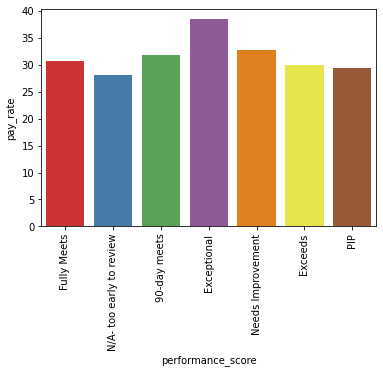

In [12]:
performance_chart = sns.barplot(x = 'performance_score', y = 'pay_rate', data=hr_data, palette='Set1', ci=None)
performance_chart.set_xticklabels(performance_chart.get_xticklabels(),rotation=90)

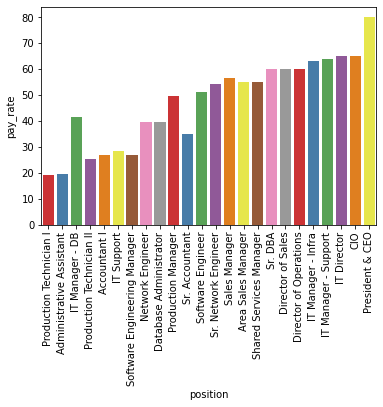

In [13]:
hr_data = hr_data.sort_values(['pay_rate']).reset_index(drop=True)
position_chart = sns.barplot(x = 'position', y = 'pay_rate', data=hr_data, palette='Set1', ci = None)
position_chart.set_xticklabels(position_chart.get_xticklabels(),rotation=90)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='pay_rate'>

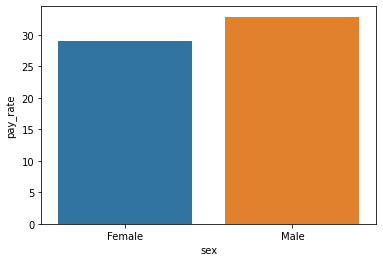

In [14]:
sns.barplot(x = 'sex', y = 'pay_rate', data=hr_data, ci=None )


<AxesSubplot:xlabel='hispanic', ylabel='pay_rate'>

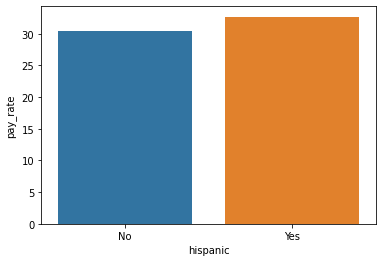

In [15]:
hr_data['hispanic'].replace('no','No', inplace = True)
hr_data['hispanic'].replace('yes','Yes', inplace = True)
sns.barplot(x = 'hispanic', y = 'pay_rate', data=hr_data, ci=None )

<AxesSubplot:xlabel='marital_desc', ylabel='pay_rate'>

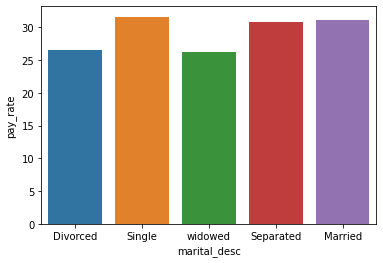

In [16]:
sns.barplot(x = 'marital_desc', y = 'pay_rate', data=hr_data, ci=None )

In [17]:
hr_data['age_bin']=pd.cut(x=hr_data['age'], bins=[20, 29, 39, 49, 59, 69])

In [19]:
type(hr_data['age_bin'][1])

pandas._libs.interval.Interval

In [20]:
hr_data['age_bin'].replace('(20, 29]','20s', inplace = True)
hr_data['age_bin'].replace('(29, 39]','30s', inplace = True)
hr_data['age_bin'].replace('(39, 49]','40s', inplace = True)
hr_data['age_bin'].replace('(49, 59]','50s', inplace = True)
hr_data['age_bin'].replace('(59, 69]','60s', inplace = True)

In [21]:
hr_data['age_bin']

0      (29, 39]
1      (39, 49]
2      (39, 49]
3      (39, 49]
4      (29, 39]
         ...   
296    (29, 39]
297    (39, 49]
298    (29, 39]
299    (29, 39]
300    (59, 69]
Name: age_bin, Length: 301, dtype: category
Categories (5, interval[int64, right]): [(20, 29] < (29, 39] < (39, 49] < (49, 59] < (59, 69]]

[Text(0, 0, '20s'),
 Text(1, 0, '30s'),
 Text(2, 0, '40s'),
 Text(3, 0, '50s'),
 Text(4, 0, '60s')]

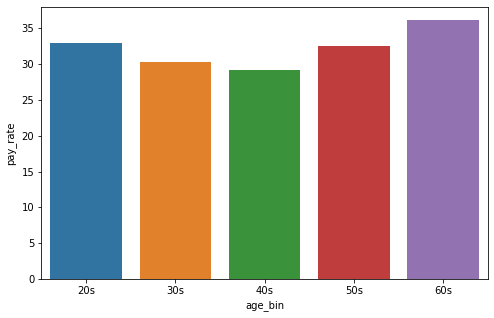

In [22]:
plt.figure(figsize=(8,5))
g = sns.barplot(x = 'age_bin', y = 'pay_rate', data=hr_data, ci=None)
g.set_xticklabels(['20s', '30s', '40s','50s','60s'])

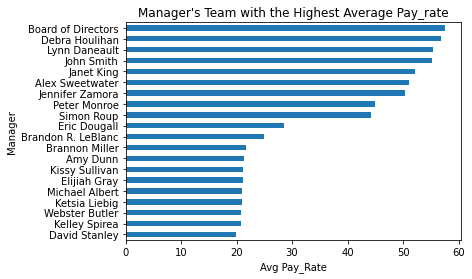

In [23]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['manager_name'])['pay_rate'].mean()
df = df.sort_values(axis=0)

xlabel = 'Avg Pay_Rate'
ylabel = 'Manager'
title= "Manager's Team with the Highest Average Pay_rate"

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

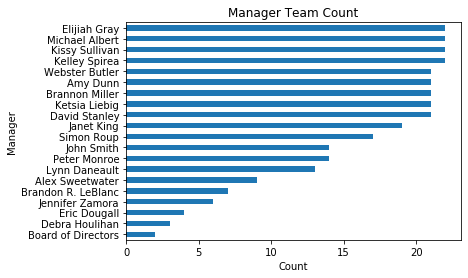

In [213]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['manager_name'])['pay_rate'].count()
df = df.sort_values(axis=0)

xlabel = 'Count'
ylabel = 'Manager'
title= "Manager Team Count"

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

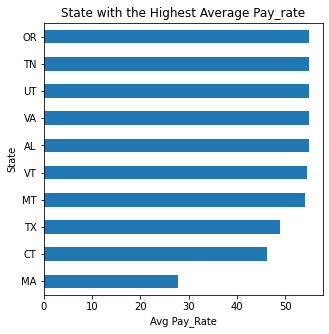

In [24]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['state'])['pay_rate'].mean()
df = df.sort_values(axis=0)
df = df.head(10)

xlabel = 'Avg Pay_Rate'
ylabel = 'State'
title= "State with the Highest Average Pay_rate"
fig = plt.figure(figsize=(5,5))

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

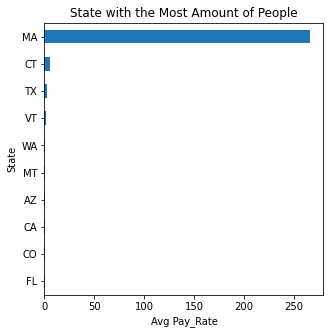

In [25]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['state'])['pay_rate'].count()
df = df.sort_values(axis=0)
df = df.tail(10)

xlabel = 'Avg Pay_Rate'
ylabel = 'State'
title= "State with the Most Amount of People"
fig = plt.figure(figsize=(5,5))

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

# Dummy Variables
**we want to create dummy variables for sex and positions**
- we drop the first column
    - sex_female was dropped
    - position Accountant 1 was dropped
    - '90-day meets' performance score was dropped
    - 'Alex Sweetwater'manager was dropped


In [26]:
performance_labels = gle.fit_transform(hr_data['performance_score'])
performances = {index: label for index, label in
                  enumerate(gle.classes_)}

managers_labels = gle.fit_transform(hr_data['manager_name'])
managers = {index: label for index, label in
                  enumerate(gle.classes_)}

In [28]:
hr_data = pd.get_dummies(hr_data, columns = ['sex','manager_name', 'position', 'performance_score'], drop_first=True)

KeyError: "None of [Index(['sex', 'manager_name', 'position', 'performance_score'], dtype='object')] are in the [columns]"

In [30]:
hr_data

,name,state,zip,DOB,age,marital_desc,citizen_desc,hispanic,race,date_of_hire,...,position_Software Engineering Manager,position_Sr. Accountant,position_Sr. DBA,position_Sr. Network Engineer,performance_score_Exceeds,performance_score_Exceptional,performance_score_Fully Meets,performance_score_N/A- too early to review,performance_score_Needs Improvement,performance_score_PIP
0,"Stanford,Barbara M",MA,2050.0,8/25/82,35.0,Divorced,US Citizen,No,Two or more races,1/10/11,...,0,0,0,0,0,0,1,0,0,0
1,"Sutwell, Barbara",MA,2718.0,8/15/68,49.0,Single,Eligible NonCitizen,No,Asian,5/14/12,...,0,0,0,0,0,0,1,0,0,0
2,"Knapp, Bradley J",MA,1721.0,11/10/77,40.0,Single,US Citizen,No,Black or African American,2/17/14,...,0,0,0,0,0,0,1,0,0,0
3,"Meads, Elizabeth",MA,1760.0,5/30/68,49.0,Single,US Citizen,No,Black or African American,4/2/12,...,0,0,0,0,0,0,1,0,0,0
4,"Gross, Paula",MA,2176.0,5/21/83,34.0,Divorced,US Citizen,No,White,2/21/11,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,"Monroe, Peter",MA,2134.0,10/5/86,31.0,Married,Eligible NonCitizen,Yes,Hispanic,2/15/12,...,0,0,0,0,0,0,0,0,1,0
297,"Dougall, Eric",MA,1886.0,7/9/70,47.0,Single,US Citizen,No,White,1/5/14,...,0,0,0,0,1,0,0,0,0,0
298,"Foss, Jason",MA,1460.0,7/5/80,37.0,Single,US Citizen,No,Black or African American,4/15/11,...,0,0,0,0,0,1,0,0,0,0
299,"Zamora, Jennifer",MA,2067.0,8/30/79,38.0,Single,US Citizen,No,White,4/10/10,...,0,0,0,0,0,1,0,0,0,0


In [31]:
hr_data = hr_data.drop(columns='emp_num')

KeyError: "['emp_num'] not found in axis"

In [32]:
hr_data

,name,state,zip,DOB,age,marital_desc,citizen_desc,hispanic,race,date_of_hire,...,position_Software Engineering Manager,position_Sr. Accountant,position_Sr. DBA,position_Sr. Network Engineer,performance_score_Exceeds,performance_score_Exceptional,performance_score_Fully Meets,performance_score_N/A- too early to review,performance_score_Needs Improvement,performance_score_PIP
0,"Stanford,Barbara M",MA,2050.0,8/25/82,35.0,Divorced,US Citizen,No,Two or more races,1/10/11,...,0,0,0,0,0,0,1,0,0,0
1,"Sutwell, Barbara",MA,2718.0,8/15/68,49.0,Single,Eligible NonCitizen,No,Asian,5/14/12,...,0,0,0,0,0,0,1,0,0,0
2,"Knapp, Bradley J",MA,1721.0,11/10/77,40.0,Single,US Citizen,No,Black or African American,2/17/14,...,0,0,0,0,0,0,1,0,0,0
3,"Meads, Elizabeth",MA,1760.0,5/30/68,49.0,Single,US Citizen,No,Black or African American,4/2/12,...,0,0,0,0,0,0,1,0,0,0
4,"Gross, Paula",MA,2176.0,5/21/83,34.0,Divorced,US Citizen,No,White,2/21/11,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,"Monroe, Peter",MA,2134.0,10/5/86,31.0,Married,Eligible NonCitizen,Yes,Hispanic,2/15/12,...,0,0,0,0,0,0,0,0,1,0
297,"Dougall, Eric",MA,1886.0,7/9/70,47.0,Single,US Citizen,No,White,1/5/14,...,0,0,0,0,1,0,0,0,0,0
298,"Foss, Jason",MA,1460.0,7/5/80,37.0,Single,US Citizen,No,Black or African American,4/15/11,...,0,0,0,0,0,1,0,0,0,0
299,"Zamora, Jennifer",MA,2067.0,8/30/79,38.0,Single,US Citizen,No,White,4/10/10,...,0,0,0,0,0,1,0,0,0,0


In [33]:
hr_data.corr()

,zip,age,pay_rate,sex_Male,manager_name_Amy Dunn,manager_name_Board of Directors,manager_name_Brandon R. LeBlanc,manager_name_Brannon Miller,manager_name_David Stanley,manager_name_Debra Houlihan,...,position_Software Engineering Manager,position_Sr. Accountant,position_Sr. DBA,position_Sr. Network Engineer,performance_score_Exceeds,performance_score_Exceptional,performance_score_Fully Meets,performance_score_N/A- too early to review,performance_score_Needs Improvement,performance_score_PIP
zip,1.000000,-0.013362,0.412814,0.056232,-0.074194,-0.022567,-4.181455e-02,-0.073724,-0.074353,0.013050,...,-0.015230,-0.021217,-0.023785,-0.022822,0.013356,0.037860,6.170426e-04,-0.055221,-0.032705,0.162007
age,-0.013362,1.000000,0.016798,-0.001973,0.016781,0.109486,-1.304554e-01,0.064983,-0.075242,-0.103558,...,0.080523,-0.041664,0.051368,0.085187,0.062327,-0.017334,1.238560e-01,-0.161248,-0.070494,0.021994
pay_rate,0.412814,0.016798,1.000000,0.123167,-0.169995,0.144071,-5.948983e-02,-0.162484,-0.194891,0.171958,...,-0.014120,0.022799,0.223722,0.203153,-0.014627,0.089647,-2.767766e-03,-0.065077,0.029922,-0.014045
sex_Male,0.056232,-0.001973,0.123167,1.000000,-0.022721,-0.069873,-4.255815e-02,-0.022721,-0.049127,-0.017999,...,0.067579,-0.069873,0.018346,0.046863,0.004309,0.008005,1.941927e-02,-0.094474,0.113490,0.008005
manager_name_Amy Dunn,-0.074194,0.016781,-0.169995,-0.022721,1.000000,-0.022398,-4.225771e-02,-0.075000,-0.075000,-0.027478,...,-0.015811,-0.022398,-0.031782,-0.035593,0.002088,0.028492,-2.635231e-02,0.096059,-0.062718,0.028492
manager_name_Board of Directors,-0.022567,0.109486,0.144071,-0.069873,-0.022398,1.000000,-1.261987e-02,-0.022398,-0.022398,-0.008206,...,-0.004722,0.496656,-0.009491,-0.010630,-0.026193,-0.014359,7.082882e-02,-0.030618,-0.018730,-0.014359
manager_name_Brandon R. LeBlanc,-0.041815,-0.130455,-0.059490,-0.042558,-0.042258,-0.012620,1.000000e+00,-0.042258,-0.042258,-0.015482,...,-0.008909,0.258707,-0.017907,-0.020055,-0.049417,-0.027090,2.511299e-17,0.076501,-0.035338,-0.027090
manager_name_Brannon Miller,-0.073724,0.064983,-0.162484,-0.022721,-0.075000,-0.022398,-4.225771e-02,1.000000,-0.075000,-0.027478,...,-0.015811,-0.022398,-0.031782,-0.035593,0.136779,0.105063,-1.054093e-01,-0.102525,-0.002787,0.258205
manager_name_David Stanley,-0.074353,-0.075242,-0.194891,-0.049127,-0.075000,-0.022398,-4.225771e-02,-0.075000,1.000000,-0.027478,...,-0.015811,-0.022398,-0.031782,-0.035593,-0.042809,-0.048080,7.905694e-02,0.056343,-0.062718,-0.048080
manager_name_Debra Houlihan,0.013050,-0.103558,0.171958,-0.017999,-0.027478,-0.008206,-1.548203e-02,-0.027478,-0.027478,1.000000,...,-0.005793,-0.008206,-0.011644,-0.013040,-0.032133,-0.017615,1.930948e-02,-0.037562,0.130720,-0.017615


In [34]:
abs(hr_data.corr())>0.75

,zip,age,pay_rate,sex_Male,manager_name_Amy Dunn,manager_name_Board of Directors,manager_name_Brandon R. LeBlanc,manager_name_Brannon Miller,manager_name_David Stanley,manager_name_Debra Houlihan,...,position_Software Engineering Manager,position_Sr. Accountant,position_Sr. DBA,position_Sr. Network Engineer,performance_score_Exceeds,performance_score_Exceptional,performance_score_Fully Meets,performance_score_N/A- too early to review,performance_score_Needs Improvement,performance_score_PIP
zip,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
age,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
pay_rate,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex_Male,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
manager_name_Amy Dunn,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
manager_name_Board of Directors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
manager_name_Brandon R. LeBlanc,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
manager_name_Brannon Miller,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
manager_name_David Stanley,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
manager_name_Debra Houlihan,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

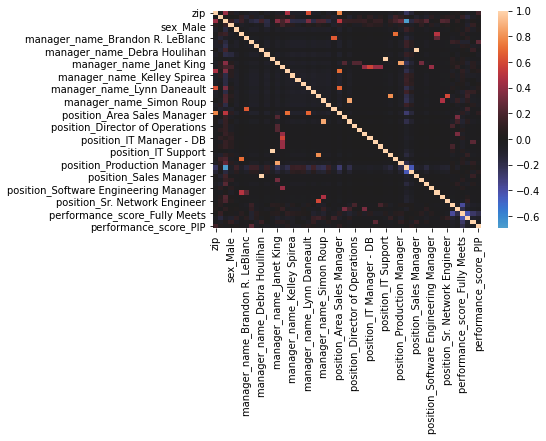

In [35]:

sns.heatmap(hr_data.corr(), center=0)


In [333]:
hr_data.columns

Index(['name', 'state', 'zip', 'DOB', 'age', 'marital_desc', 'citizen_desc',
       'hispanic', 'race', 'date_of_hire', 'date_of_term', 'reason_for_term',
       'emp_status', 'department', 'pay_rate', 'employee_source', 'sex_Male',
       'manager_name_Amy Dunn', 'manager_name_Board of Directors',
       'manager_name_Brandon R. LeBlanc', 'manager_name_Brannon Miller',
       'manager_name_David Stanley', 'manager_name_Debra Houlihan',
       'manager_name_Elijiah Gray', 'manager_name_Eric Dougall',
       'manager_name_Janet King', 'manager_name_Jennifer Zamora',
       'manager_name_John Smith', 'manager_name_Kelley Spirea',
       'manager_name_Ketsia Liebig', 'manager_name_Kissy Sullivan',
       'manager_name_Lynn Daneault', 'manager_name_Michael Albert',
       'manager_name_Peter Monroe', 'manager_name_Simon Roup',
       'manager_name_Webster Butler', 'position_Administrative Assistant',
       'position_Area Sales Manager', 'position_CIO',
       'position_Database Administra

In [334]:
feats = ['manager_name_Amy Dunn','performance_score_Exceeds', 'performance_score_Exceptional','performance_score_Fully Meets','performance_score_N/A- too early to review','performance_score_Needs Improvement', 'performance_score_PIP']
corr = hr_data[feats].corr()
descr = hr_data[feats].describe()
descr

,manager_name_Amy Dunn,performance_score_Exceeds,performance_score_Exceptional,performance_score_Fully Meets,performance_score_N/A- too early to review,performance_score_Needs Improvement,performance_score_PIP
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.069767,0.093023,0.029900,0.571429,0.122924,0.049834,0.029900
std,0.255179,0.290949,0.170596,0.495696,0.328896,0.217964,0.170596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


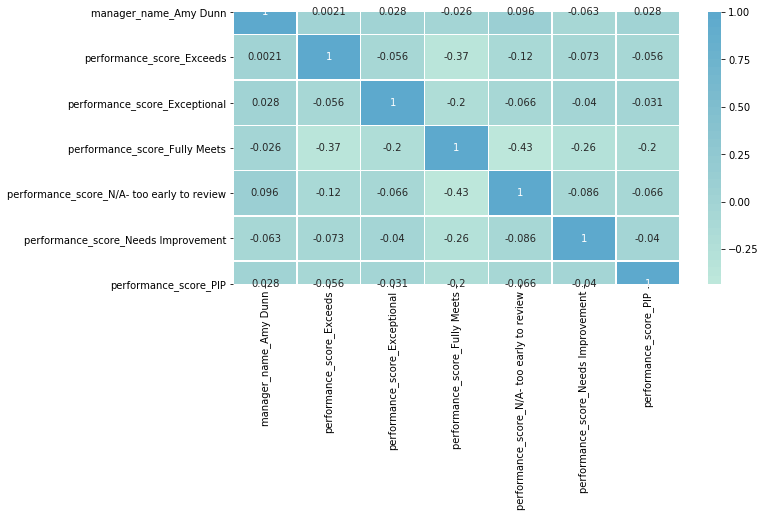

In [335]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr, center=5, annot=True, linewidths=.5, ax=ax)